In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


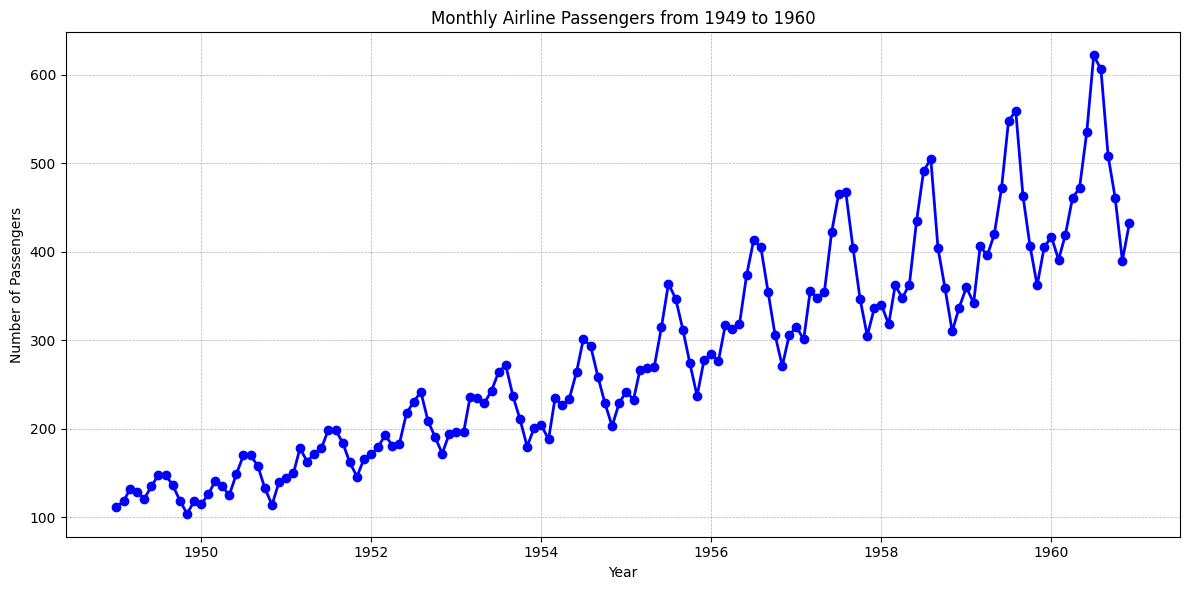

In [9]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Airline Passengers from 1949 to 1960')
plt.ylabel('Number of Passengers')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

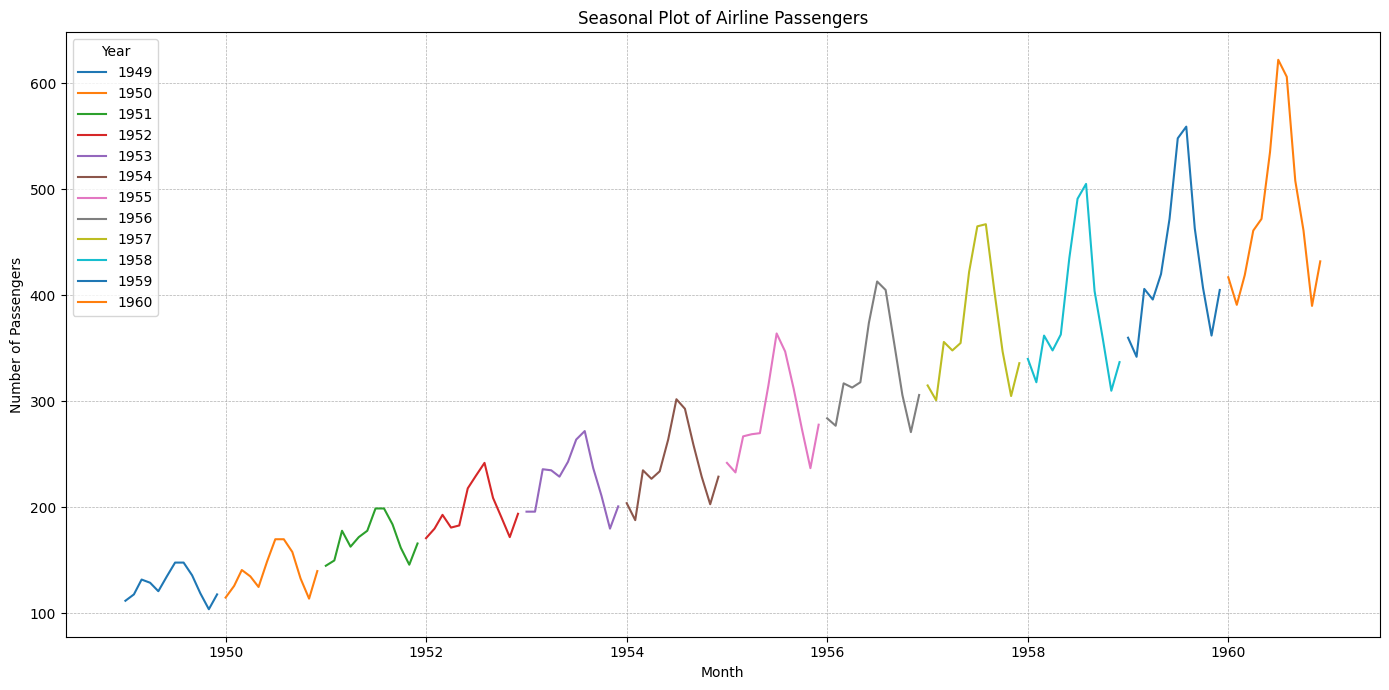

In [10]:
# Extract years from the data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(14,7))
for year in years:
    subset = df[df.index.year == year]
    plt.plot(subset['Passengers'], label=year)

plt.title('Seasonal Plot of Airline Passengers')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

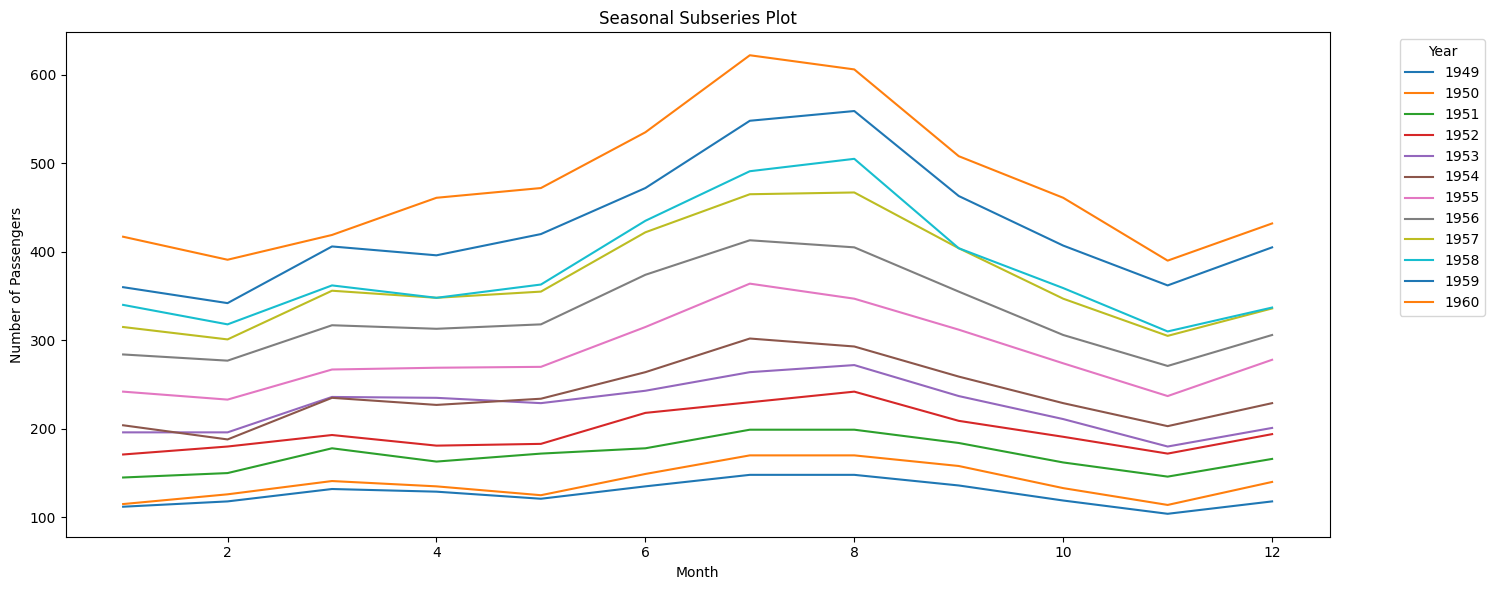

In [11]:
# Extract month and year from the date
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table so that we get years on the x-axis and months on the y-axis
table = pd.pivot_table(df, values='Passengers', index=['month'], columns=['Year'], aggfunc='sum')

# Plot the seasonal subseries
fig, ax = plt.subplots(figsize=(15, 6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.set_title('Seasonal Subseries Plot')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

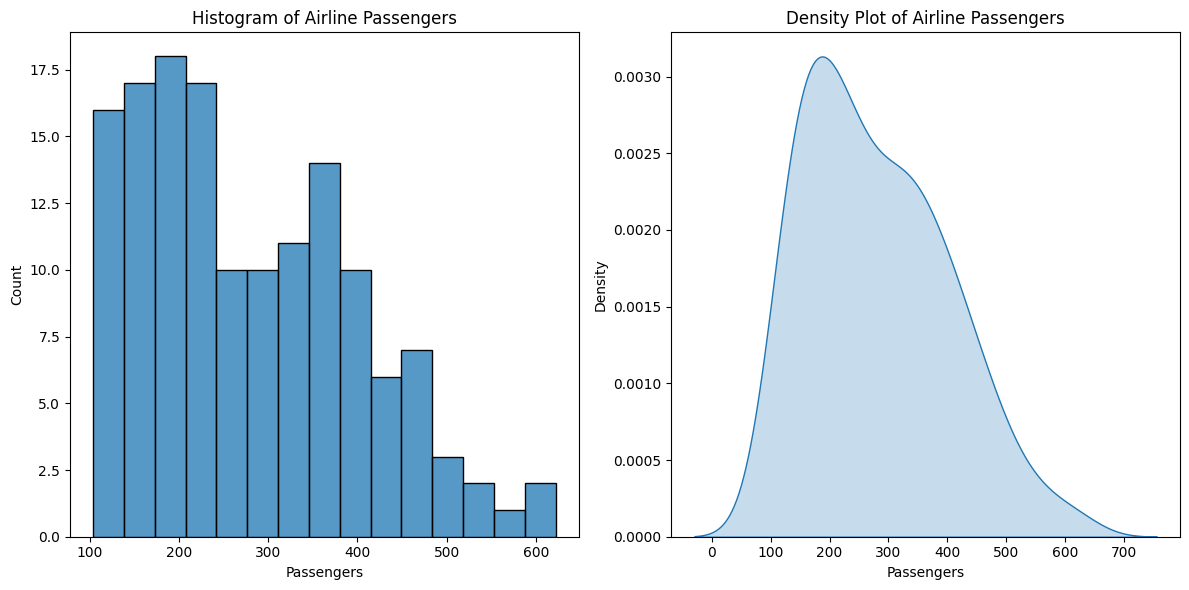

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Histogram
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Passengers'], bins=15, kde=False)
plt.title('Histogram of Airline Passengers')

# Density plot (KDE)
plt.subplot(1,2,2)
sns.kdeplot(df['Passengers'], fill=True)
plt.title('Density Plot of Airline Passengers')

plt.tight_layout()
plt.show()


## Excercise 1

### Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series.

Downloaded files: ['Sunspots.csv']
   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7
Columns in the dataset: Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')


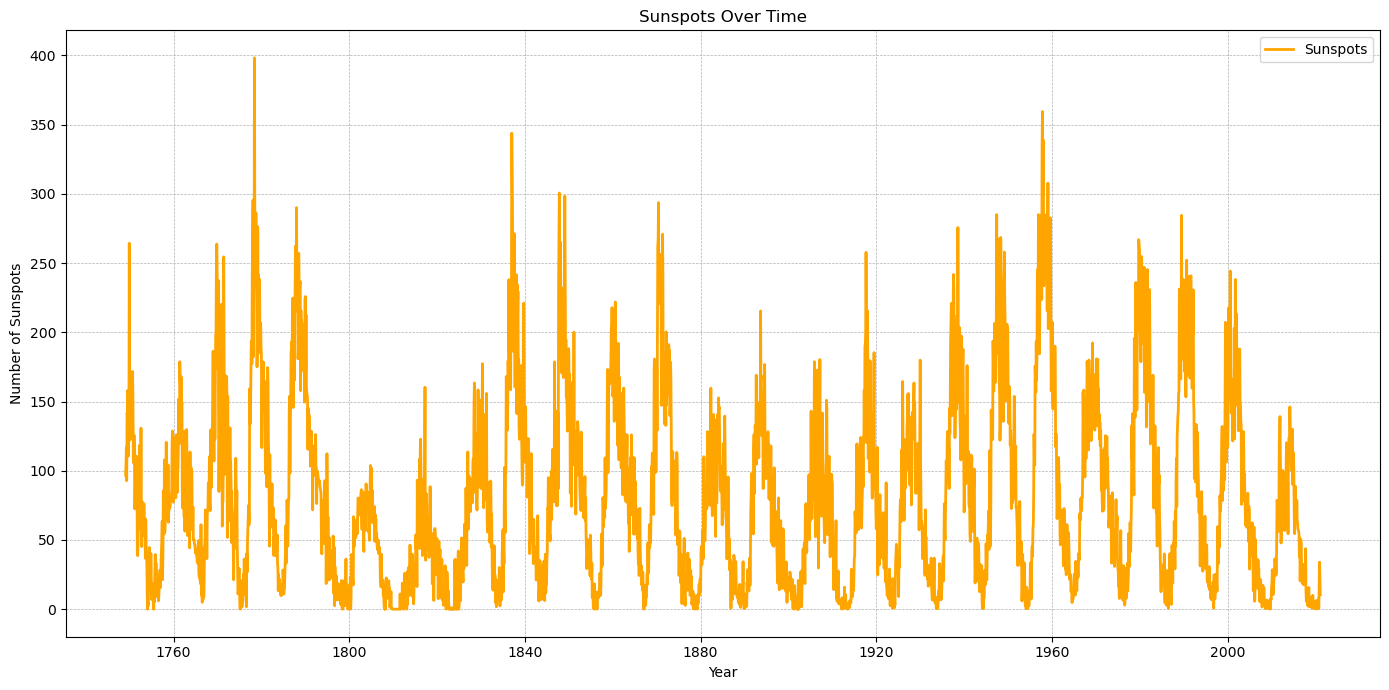

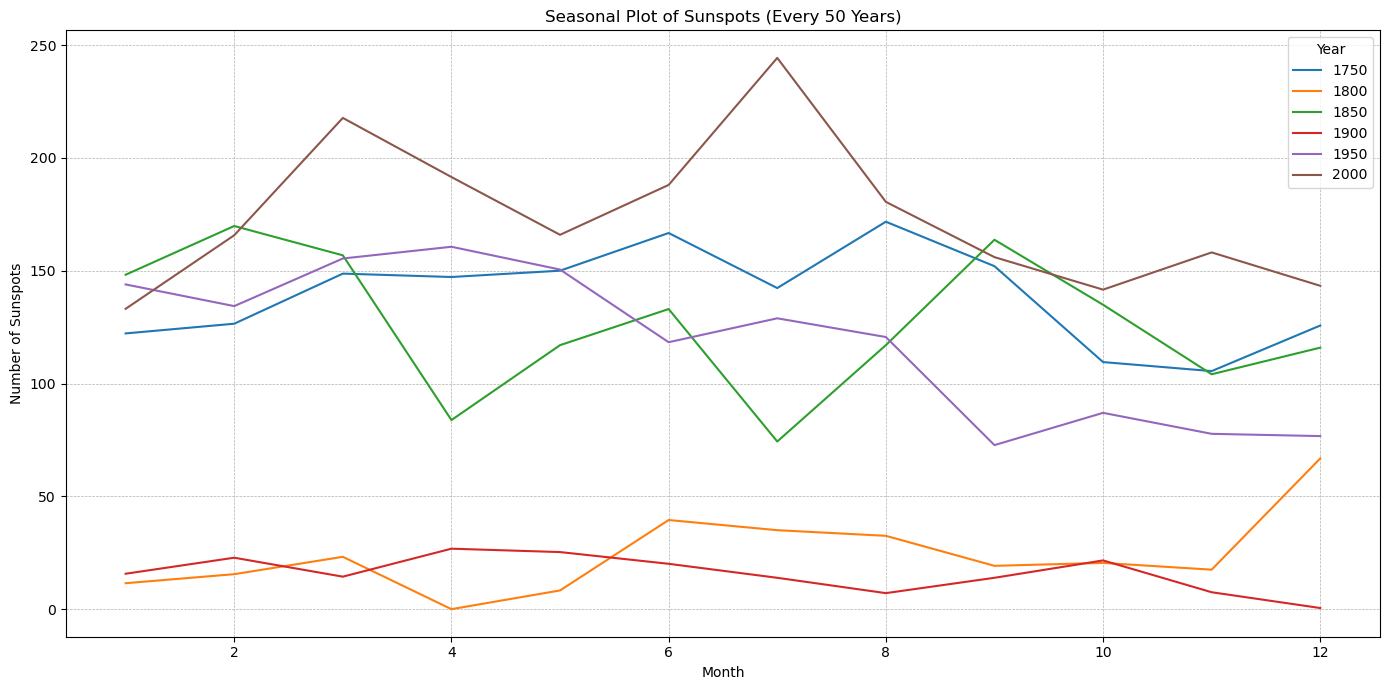

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("robervalt/sunspots")

# Locate the downloaded files
downloaded_files = os.listdir(path)
print("Downloaded files:", downloaded_files)

# Assuming the CSV file is named 'sunspots.csv', you can modify this if the name is different
csv_file_path = os.path.join(path, 'sunspots.csv')

# Load the Sunspots dataset
df_sunspots = pd.read_csv(csv_file_path)

# Display the first few rows and the columns of the dataset
print(df_sunspots.head())
print("Columns in the dataset:", df_sunspots.columns)

# Convert 'Date' column to datetime and set as index
df_sunspots['Date'] = pd.to_datetime(df_sunspots['Date'])
df_sunspots.set_index('Date', inplace=True)

# Plotting the number of sunspots over time
plt.figure(figsize=(14, 7))
plt.plot(df_sunspots.index, df_sunspots['Monthly Mean Total Sunspot Number'], color='orange', linewidth=2, label='Sunspots')
plt.title('Sunspots Over Time')
plt.ylabel('Number of Sunspots')
plt.xlabel('Year')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Extract years from the data
years_sunspots = df_sunspots.index.year.unique()

# Plotting each year as its own line for every 50 years
plt.figure(figsize=(14, 7))
for year in years_sunspots:
    if year % 50 == 0:  # Only plot years that are multiples of 50
        subset = df_sunspots[df_sunspots.index.year == year]
        plt.plot(subset.index.month, subset['Monthly Mean Total Sunspot Number'], label=year)

plt.title('Seasonal Plot of Sunspots (Every 50 Years)')
plt.ylabel('Number of Sunspots')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

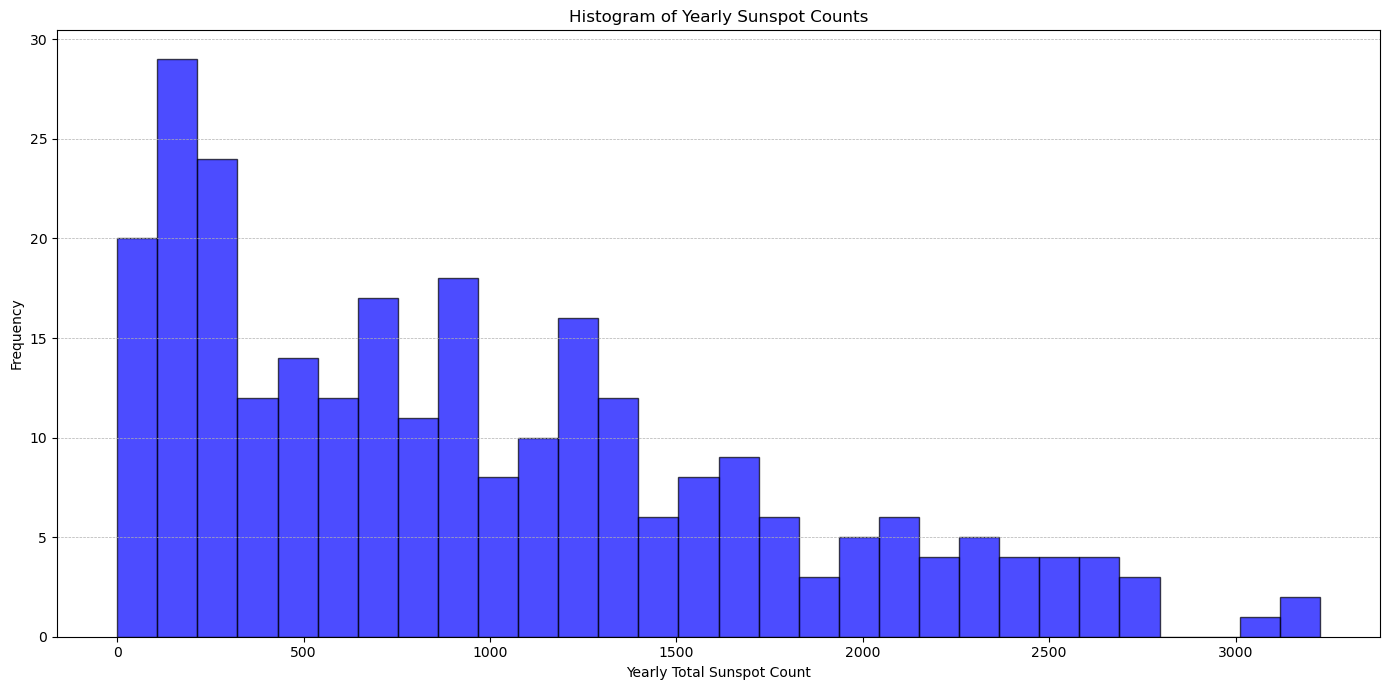

In [7]:
# Summing sunspots by year
df_sunspots['Year'] = df_sunspots.index.year  # Create a 'Year' column for grouping
yearly_counts = df_sunspots.groupby('Year')['Monthly Mean Total Sunspot Number'].sum()

# Plotting the histogram
plt.figure(figsize=(14, 7))
plt.hist(yearly_counts, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Yearly Sunspot Counts')
plt.xlabel('Yearly Total Sunspot Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Excercise 2

### Use the Unemployment in America dataset (https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state) to demonstrate basic concepts of time series.

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os


df_unemployment = pd.read_csv('/Users/diegosanchez/Documents/universidad copy/Semestre 7/notebooks_gsus/db/Unemployment in America Per US State.csv')

df_unemployment.head()


,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


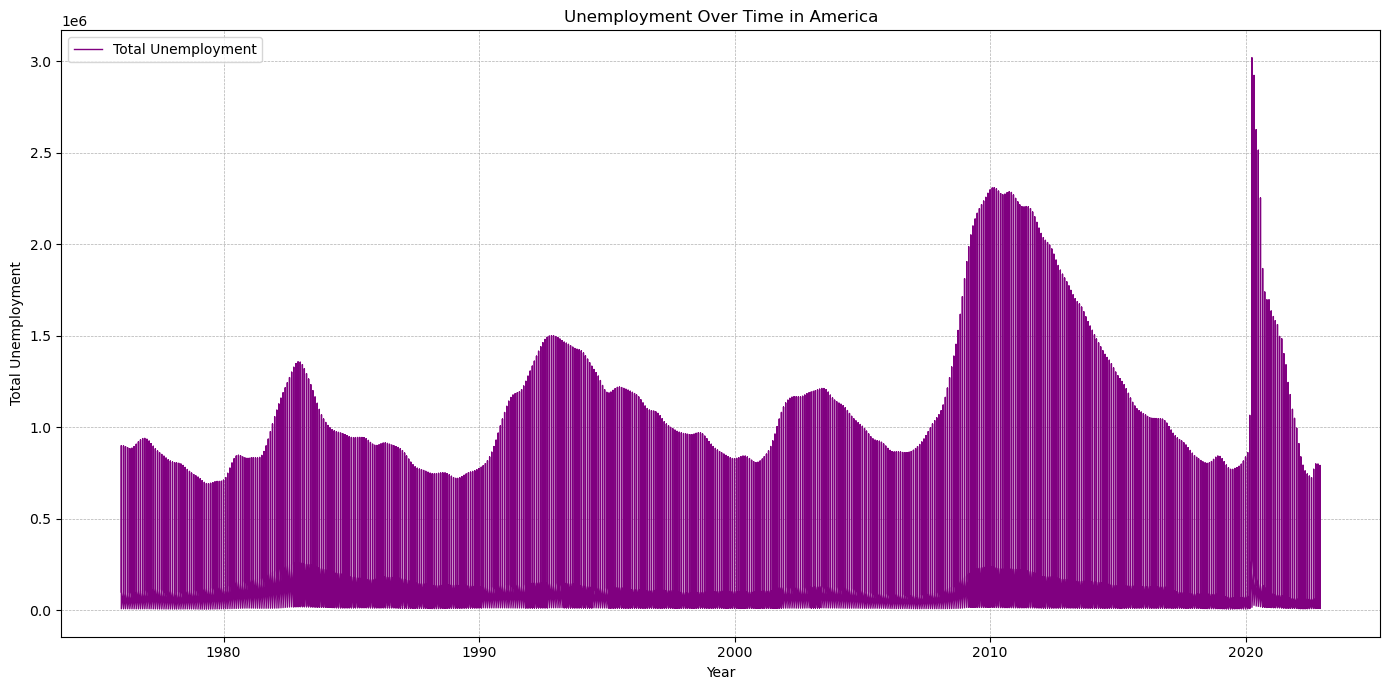

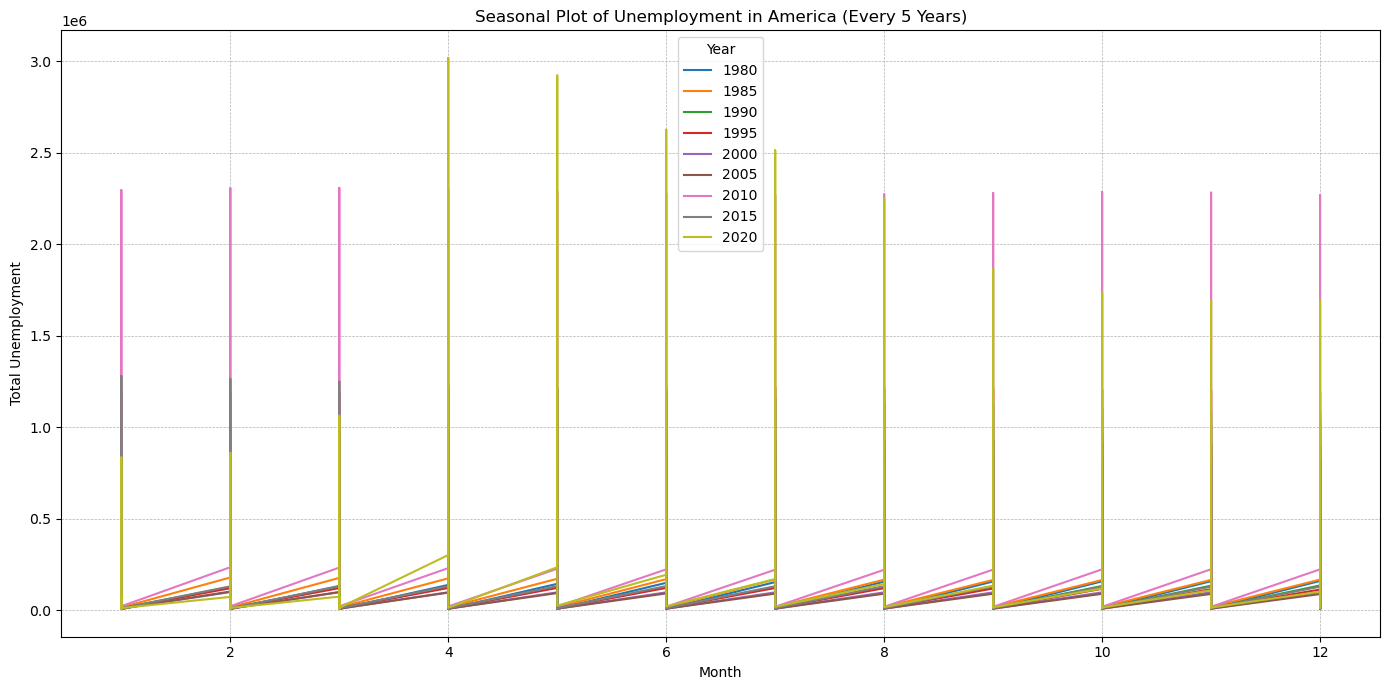

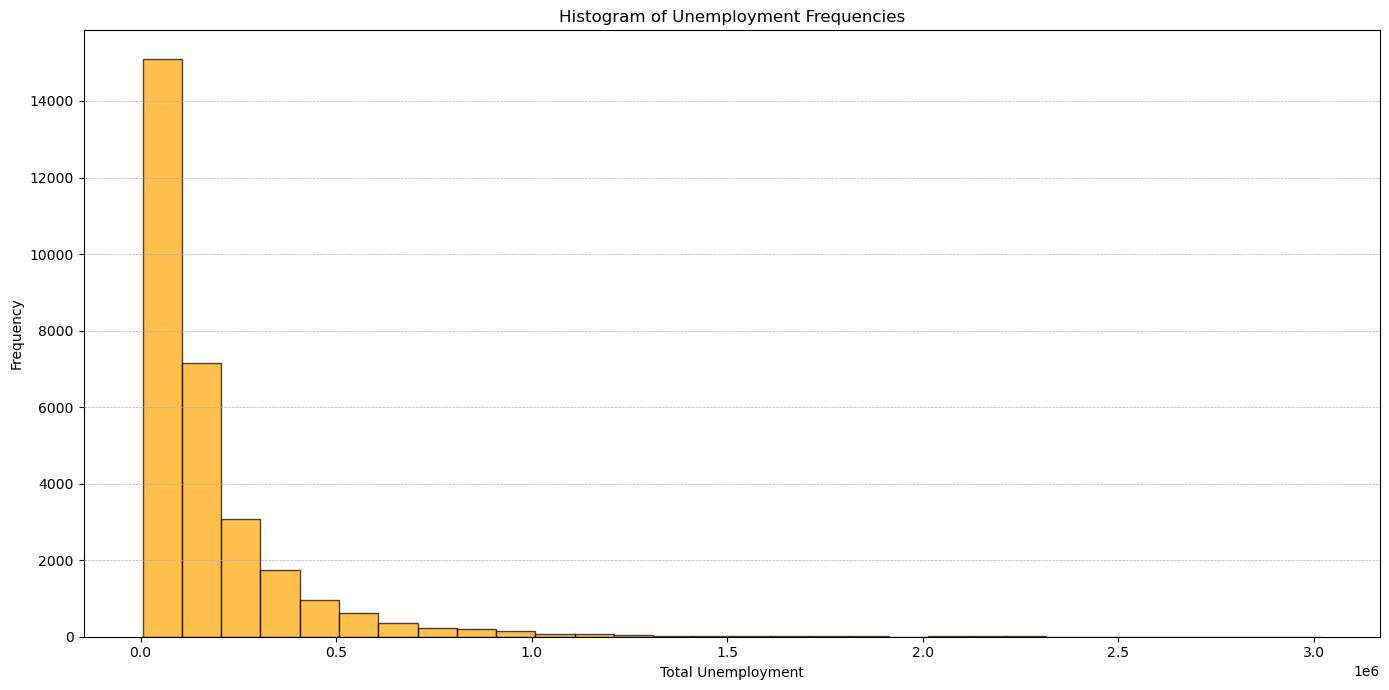

In [23]:

# Convert 'Total Unemployment in State/Area' column to numeric by removing commas and spaces
df_unemployment['Total Unemployment in State/Area'] = pd.to_numeric(
    df_unemployment['Total Unemployment in State/Area'].replace({',': '', ' ': ''}, regex=True)
)

# Combine 'Year' and 'Month' columns into a datetime format and set it as the index
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Year'].astype(str) + '-' + df_unemployment['Month'].astype(str))
df_unemployment.set_index('Date', inplace=True)

# Plotting the unemployment data as a time series
plt.figure(figsize=(14, 7))
plt.plot(df_unemployment.index, df_unemployment['Total Unemployment in State/Area'], color='purple', linewidth=1, label='Total Unemployment')
plt.title('Unemployment Over Time in America')
plt.ylabel('Total Unemployment')
plt.xlabel('Year')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Extract years from the data
years_unemployment = df_unemployment.index.year.unique()

# Plotting each year as its own line to visualize seasonality
plt.figure(figsize=(14, 7))
for year in years_unemployment:
    if year % 5 == 0:  # Plot for every 10 years
        subset = df_unemployment[df_unemployment.index.year == year]
        plt.plot(subset.index.month, subset['Total Unemployment in State/Area'], label=year)

plt.title('Seasonal Plot of Unemployment in America (Every 5 Years)')
plt.ylabel('Total Unemployment')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Histogram of unemployment frequencies
plt.figure(figsize=(14, 7))
plt.hist(df_unemployment['Total Unemployment in State/Area'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Unemployment Frequencies')
plt.xlabel('Total Unemployment')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()